In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("indian_telecom_churn.csv")
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [5]:
df.shape

(243553, 14)

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,243553.0,NaN,NaN,NaN,121777.0,70307.839393,1.0,60889.0,121777.0,182665.0,243553.0
telecom_partner,243553,4,Reliance Jio,61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,243553,2,M,145977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,243553.0,NaN,NaN,NaN,46.077609,16.444029,18.0,32.0,46.0,60.0,74.0
state,243553,28,Uttarakhand,8856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,243553,6,Chennai,40749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pincode,243553.0,NaN,NaN,NaN,549501.270541,259808.860574,100006.0,324586.0,548112.0,774994.0,999987.0
date_of_registration,243553,1220,2020-01-01,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_dependents,243553.0,NaN,NaN,NaN,1.9975,1.414941,0.0,1.0,2.0,3.0,4.0
estimated_salary,243553.0,NaN,NaN,NaN,85021.137839,37508.963233,20000.0,52585.0,84990.0,117488.0,149999.0


In [9]:
#description and overview of the dataset
def data_overview(df, message):
    print(f'{message}:\n')
    print('Number of Rows: ', df.shape[0])
    print("\nNumber of Columns: ", df.shape[1])
    print('\nColumn Names in the dataset:')
    print(df.columns.tolist())
    print('\nUnique values:')
    print(df.nunique())

data_overview(df, 'Overview of the dataset')

Overview of the dataset:

Number of Rows:  243553

Number of Columns:  14

Column Names in the dataset:
['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city', 'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'churn']

Unique values:
customer_id             243553
telecom_partner              4
gender                       2
age                         57
state                       28
city                         6
pincode                 213442
date_of_registration      1220
num_dependents               5
estimated_salary        110032
calls_made                 119
sms_sent                    59
data_used                11837
churn                        2
dtype: int64


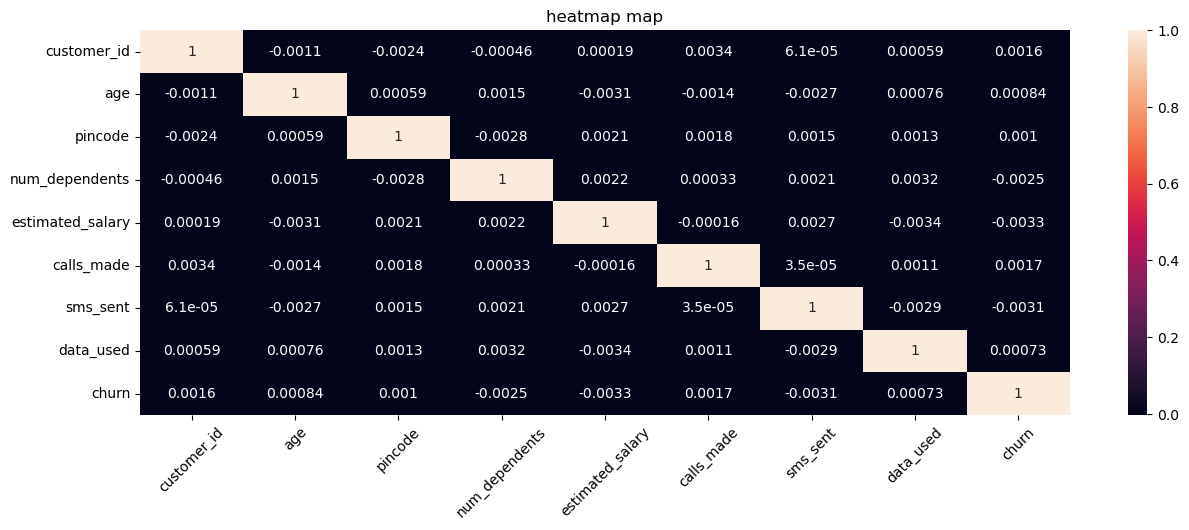

In [19]:
numeric_df = df.select_dtypes(include=['int64'])
plt.figure(figsize=(15,5))
sns.heatmap(numeric_df.corr(),annot=True)
plt.title("heatmap map")
plt.xticks(rotation=45)
plt.show()

In [21]:
df['churn'].value_counts()

churn
0    194726
1     48827
Name: count, dtype: int64

In [23]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=encode.fit_transform(df[col])

In [25]:
x=df.drop('churn',axis=1)
y=df['churn']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [29]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_train_scaled=scale.fit_transform(x_train_smote)
x_test_scaled=scale.transform(x_test)

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}
accuracy_results = {}

for model_name, model in tqdm(models.items(), desc="Fitting models"):
    model.fit(x_train_scaled,y_train_smote)
    y_test_pred=model.predict(x_test_scaled)
    acc=accuracy_score(y_test,y_test_pred)
    accuracy_results[model_name] = acc

Fitting models: 100%|████████████████████████████████████████████████████████████████████| 3/3 [02:03<00:00, 41.09s/it]


In [50]:
for model_name, accuracy in accuracy_results.items():
    print(f'{model_name}: {accuracy:.4f}')

Logistic Regression: 0.5682
Random Forest: 0.6618
Naive Bayes: 0.6009
